In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

In [2]:
from funcat import *

jqdatasdk not installed


In [9]:
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
from funcat.data.quantaxis_backend import QuantaxisDataBackend

backend = "quantaxis"

if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
elif backend == "quantaxis":
    set_data_backend(QuantaxisDataBackend())
set_start_date("2019-01-01")
S("000001.XSHG")  # 设置当前关注股票
T("2020-06-01")   # 设置当前观察日期

## 基本API

In [10]:
print(O, H, L, C, V)  # 打印 Open High Low Close

2871.96 2917.15 2871.96 2915.43 2601960.0


In [11]:
C / C[1] - 1  # 当天涨幅

0.022115098077024165

In [12]:
MA(C, 60)  # 打印60日均线

2840.014499999998

In [13]:
C > MA(C, 60)  # 判断收盘价是否大于60日均线

True

In [14]:
HHV(H, 30)  # 30日最高价

2917.15

In [15]:
COUNT(C > MA(C, 60), 30)  # 最近30日，收盘价 Close 大于60日均线的天数

16

In [16]:
CROSS(MA(C, 10), MA(C, 20))  # 10日均线上穿

False

In [17]:
COUNT(C > O, 10)  # 最近10天收阳线的天数

6

In [18]:
HHV(MAX(O, C), 60)  # 最近60天K线实体的最高价

3071.68

In [19]:
CROSS(MA(C, 5), MA(C, 10))  # 5日均线上穿10日均线

True

## 自定义公式

### 0x01 KDJ指标

60.565364004600184 45.61968070224749 90.45673060930557


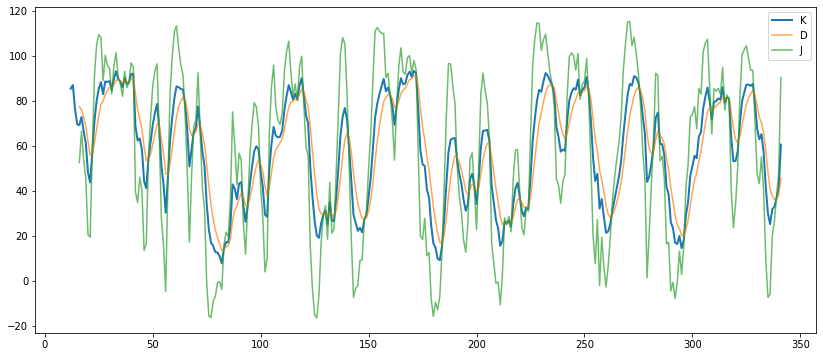

In [20]:
N, M1, M2 = 9, 3, 3

RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
K = EMA(RSV, (M1 * 2 - 1))
D = EMA(K, (M2 * 2 - 1))
J = K * 3 - D * 2

ax = plt.subplot()

plt.plot(K.series, label="K", linewidth=2)
plt.plot(D.series, label="D", alpha=0.7)
plt.plot(J.series, label="J", alpha=0.7)

print(K, D, J)
plt.legend(loc="best")

### 0x02 均线金叉死叉

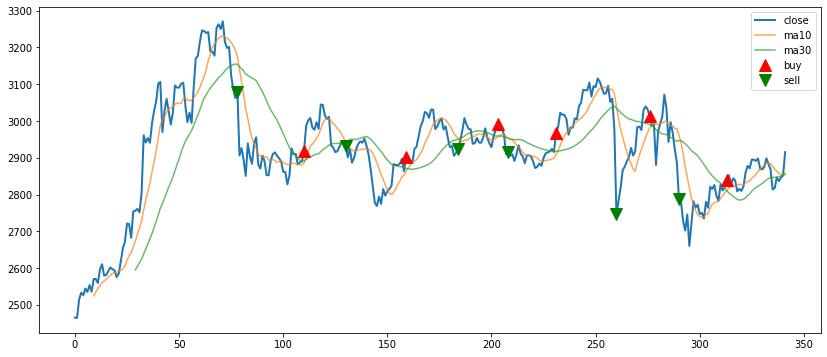

In [21]:
ax = plt.subplot()

ma10 = MA(C, 10)
ma30 = MA(C, 30)
buy_signal = CROSS(ma10, ma30)
sell_signal = CROSS(ma30, ma10)

plt.plot(C.series, label="close", linewidth=2)
plt.plot(ma10.series, label="ma10", alpha=0.7)
plt.plot(ma30.series, label="ma30", alpha=0.7)

plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")

### 0x03 DMA指标（Different of Moving Average）
[DMA指标](http://wiki.mbalib.com/wiki/DMA)。DMA指标（Different of Moving Average）又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。

38.04040000000259 46.24572000000239


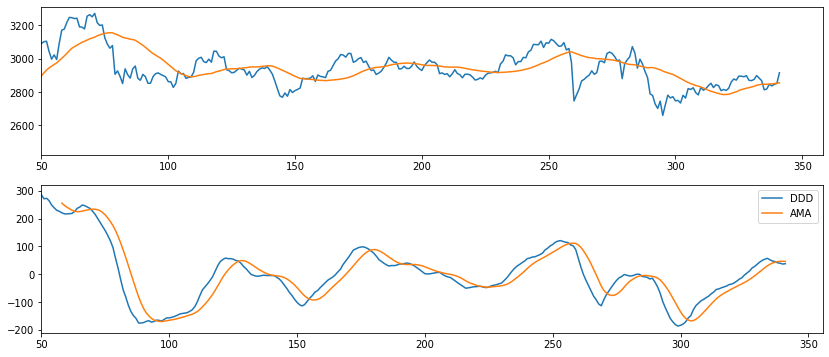

In [22]:
M1 = 10
M2 = 50
M3 = 10

DDD = MA(CLOSE, M1) - MA(CLOSE, M2)
AMA = MA(DDD, M3)

print(DDD, AMA)

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(C.series, label="close")
ax1.plot(MA(C, 30).series, label="ma60")
ax1.set_xlim(50)

ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(50)

plt.legend(loc="best")

## 选股

In [23]:
# 选出涨停股
select(
    lambda : C / C[1] - 1 >= 0.0995,
    start_date=20170104,
	end_date=20170104,
)

  0%|          | 0/4328 [00:00<?, ?it/s]

lambda : C / C[1] - 1 >= 0.0995,
[20170104]


Processing 000023:   0%|          | 17/4328 [00:00<02:59, 24.04it/s]

20170104 000017 *ST中华A


Processing 000029:   1%|          | 23/4328 [00:01<03:19, 21.63it/s]

20170104 000026 飞亚达


Processing 000055:   1%|          | 38/4328 [00:01<02:54, 24.52it/s]

20170104 000045 深纺织Ａ


Processing 000591:   4%|▍         | 167/4328 [00:06<02:37, 26.35it/s]

20170104 000585 *ST东电


Processing 000600:   4%|▍         | 174/4328 [00:06<02:31, 27.37it/s]

20170104 000595 *ST宝实


Processing 000683:   5%|▌         | 232/4328 [00:09<02:35, 26.32it/s]

20170104 000678 襄阳轴承


Processing 000701:   6%|▌         | 245/4328 [00:09<02:37, 25.94it/s]

20170104 000695 滨海能源


Processing 000716:   6%|▌         | 257/4328 [00:10<02:45, 24.55it/s]

20170104 000710 贝瑞基因


Processing 000760:   7%|▋         | 288/4328 [00:11<02:36, 25.85it/s]

20170104 000755 山西路桥


Processing 000890:   9%|▊         | 369/4328 [00:14<02:28, 26.70it/s]

20170104 000885 城发环境


Processing 000965:  10%|▉         | 425/4328 [00:16<02:34, 25.21it/s]

20170104 000959 首钢股份


Processing 001914:  11%|█         | 460/4328 [00:18<01:56, 33.06it/s]

QA Error QA_fetch_stock_day_adv parameter code=001201 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=001202 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=001203 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=001205 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=001206 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002003:  11%|█         | 464/4328 [00:18<01:58, 32.66it/s]

QA Error QA_fetch_stock_day_adv parameter code=001965 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002247:  16%|█▋        | 705/4328 [00:27<02:40, 22.57it/s]

20170104 002245 蔚蓝锂芯


Processing 002302:  17%|█▋        | 757/4328 [00:30<02:12, 26.96it/s]

20170104 002297 博云新材
20170104 002300 太阳电缆


Processing 002466:  21%|██▏       | 920/4328 [00:36<02:09, 26.24it/s]

20170104 002461 珠江啤酒


Processing 002535:  23%|██▎       | 988/4328 [00:39<02:14, 24.82it/s]

20170104 002530 金财互联


Processing 002708:  27%|██▋       | 1157/4328 [00:46<01:58, 26.71it/s]

20170104 002703 浙江世宝


Processing 002714:  27%|██▋       | 1164/4328 [00:46<01:54, 27.61it/s]

20170104 002709 天赐材料
QA Error QA_fetch_stock_day_adv parameter code=002710 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002725:  27%|██▋       | 1174/4328 [00:47<01:52, 28.03it/s]

QA Error QA_fetch_stock_day_adv parameter code=002720 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002743:  28%|██▊       | 1194/4328 [00:48<02:42, 19.28it/s]

20170104 002738 中矿资源


Processing 002779:  28%|██▊       | 1225/4328 [00:49<02:19, 22.24it/s]

QA Error QA_fetch_stock_day_adv parameter code=002774 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002828:  29%|██▉       | 1270/4328 [00:51<01:55, 26.58it/s]

QA Error QA_fetch_stock_day_adv parameter code=002824 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002852:  30%|██▉       | 1280/4328 [00:52<01:51, 27.44it/s]

20170104 002833 弘亚数控
20170104 002835 同为股份
20170104 002836 新宏泽
20170104 002837 英维克
QA Error QA_fetch_stock_day_adv parameter code=002838 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002839 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002840 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002841 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002842 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002843 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002845 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter c

Processing 002886:  30%|███       | 1315/4328 [00:52<00:31, 94.30it/s]

QA Error QA_fetch_stock_day_adv parameter code=002853 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002855 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002856 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002857 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002858 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002859 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002860 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002861 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002922:  31%|███       | 1345/4328 [00:52<00:24, 119.54it/s]

QA Error QA_fetch_stock_day_adv parameter code=002887 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002888 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002889 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002890 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002891 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002892 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002893 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002895 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002956:  32%|███▏      | 1375/4328 [00:52<00:22, 129.91it/s]

QA Error QA_fetch_stock_day_adv parameter code=002923 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002925 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002926 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002927 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002928 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002929 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002930 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002931 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 002987:  32%|███▏      | 1405/4328 [00:52<00:22, 130.34it/s]

QA Error QA_fetch_stock_day_adv parameter code=002957 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002958 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002959 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002960 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002961 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002962 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002963 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002965 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 003013:  33%|███▎      | 1438/4328 [00:53<00:20, 140.73it/s]

QA Error QA_fetch_stock_day_adv parameter code=002988 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002989 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002990 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002991 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002992 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002993 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002995 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002996 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 003816:  34%|███▎      | 1453/4328 [00:53<00:22, 130.11it/s]

QA Error QA_fetch_stock_day_adv parameter code=003015 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003016 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003017 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003018 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003019 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003020 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003021 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003022 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300078:  36%|███▌      | 1545/4328 [00:56<01:39, 27.96it/s] 

20170104 300073 当升科技


Processing 300135:  37%|███▋      | 1600/4328 [00:58<01:37, 28.00it/s]

20170104 300130 新国都


Processing 300181:  38%|███▊      | 1646/4328 [00:59<01:37, 27.38it/s]

20170104 300175 朗源股份


Processing 300224:  39%|███▉      | 1687/4328 [01:01<01:44, 25.35it/s]

20170104 300219 鸿利智汇


Processing 300247:  40%|███▉      | 1710/4328 [01:02<01:40, 26.06it/s]

20170104 300243 瑞丰高材


Processing 300309:  41%|████      | 1773/4328 [01:04<01:38, 26.01it/s]

20170104 300304 云意电气


Processing 300344:  42%|████▏     | 1806/4328 [01:06<01:36, 26.21it/s]

20170104 300340 科恒股份


Processing 300407:  43%|████▎     | 1868/4328 [01:08<01:34, 26.13it/s]

20170104 300402 宝色股份


Processing 300458:  44%|████▍     | 1919/4328 [01:10<01:27, 27.42it/s]

QA Error QA_fetch_stock_day_adv parameter code=300454 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300506:  45%|████▌     | 1966/4328 [01:12<02:24, 16.29it/s]

20170104 300503 昊志机电
QA Error QA_fetch_stock_day_adv parameter code=300504 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300517:  46%|████▌     | 1977/4328 [01:13<02:14, 17.50it/s]

QA Error QA_fetch_stock_day_adv parameter code=300514 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300559:  47%|████▋     | 2015/4328 [01:14<01:14, 31.09it/s]

QA Error QA_fetch_stock_day_adv parameter code=300554 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300570:  47%|████▋     | 2027/4328 [01:15<01:12, 31.88it/s]

QA Error QA_fetch_stock_day_adv parameter code=300564 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300575:  47%|████▋     | 2031/4328 [01:15<01:11, 32.09it/s]

20170104 300571 平治信息
20170104 300573 兴齐眼药


Processing 300580:  47%|████▋     | 2038/4328 [01:15<01:32, 24.67it/s]

20170104 300576 容大感光
20170104 300577 开润股份
QA Error QA_fetch_stock_day_adv parameter code=300578 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 300579 数字认证
QA Error QA_fetch_stock_day_adv parameter code=300580 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300585:  47%|████▋     | 2041/4328 [01:15<01:42, 22.37it/s]

20170104 300581 晨曦航空
20170104 300582 英飞特
QA Error QA_fetch_stock_day_adv parameter code=300583 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300584 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 300585 奥联电子


Processing 300616:  48%|████▊     | 2060/4328 [01:16<00:41, 54.11it/s]

QA Error QA_fetch_stock_day_adv parameter code=300587 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300588 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300589 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300590 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300591 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300592 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300593 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300594 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300652:  49%|████▊     | 2109/4328 [01:16<00:18, 118.53it/s]

QA Error QA_fetch_stock_day_adv parameter code=300617 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300618 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300619 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300620 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300621 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300622 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300623 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300624 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300676:  49%|████▉     | 2122/4328 [01:16<00:18, 121.56it/s]

QA Error QA_fetch_stock_day_adv parameter code=300653 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300654 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300655 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300656 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300657 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300658 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300659 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300660 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300713:  50%|████▉     | 2150/4328 [01:16<00:17, 125.20it/s]

QA Error QA_fetch_stock_day_adv parameter code=300678 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300679 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300680 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300681 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300682 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300683 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300684 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300685 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300753:  51%|█████     | 2191/4328 [01:16<00:13, 160.27it/s]

QA Error QA_fetch_stock_day_adv parameter code=300715 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300716 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300717 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300718 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300719 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300720 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300721 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300722 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300791:  51%|█████▏    | 2227/4328 [01:17<00:12, 167.27it/s]

QA Error QA_fetch_stock_day_adv parameter code=300755 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300756 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300757 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300758 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300759 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300760 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300761 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300762 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300830:  52%|█████▏    | 2261/4328 [01:17<00:12, 161.01it/s]

QA Error QA_fetch_stock_day_adv parameter code=300792 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300793 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300795 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300796 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300797 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300798 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300799 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300800 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300869:  53%|█████▎    | 2299/4328 [01:17<00:11, 172.22it/s]

QA Error QA_fetch_stock_day_adv parameter code=300831 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300832 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300833 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300835 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300836 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300837 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300838 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300839 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300897:  54%|█████▍    | 2334/4328 [01:17<00:12, 162.11it/s]

QA Error QA_fetch_stock_day_adv parameter code=300870 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300871 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300872 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300873 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300875 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300876 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300877 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300878 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300923:  54%|█████▍    | 2351/4328 [01:17<00:14, 137.03it/s]

QA Error QA_fetch_stock_day_adv parameter code=300898 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300899 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300900 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300901 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300902 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300903 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300905 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300906 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300953:  55%|█████▍    | 2380/4328 [01:18<00:15, 127.70it/s]

QA Error QA_fetch_stock_day_adv parameter code=300925 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300926 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300927 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300928 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300929 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300930 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300931 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300932 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 300981:  56%|█████▌    | 2411/4328 [01:18<00:15, 126.30it/s]

QA Error QA_fetch_stock_day_adv parameter code=300956 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300957 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300958 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300959 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300960 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300961 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300962 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300963 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600004:  56%|█████▌    | 2426/4328 [01:18<00:14, 131.08it/s]

QA Error QA_fetch_stock_day_adv parameter code=300982 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300983 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300985 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300986 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300987 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300988 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300989 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300990 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600029:  57%|█████▋    | 2451/4328 [01:19<00:37, 50.33it/s] 

QA Error QA_fetch_stock_day_adv parameter code=600025 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600038:  57%|█████▋    | 2451/4328 [01:19<00:37, 50.33it/s]

QA Error QA_fetch_stock_day_adv parameter code=600032 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600151:  59%|█████▉    | 2548/4328 [01:23<01:10, 25.07it/s]

QA Error QA_fetch_stock_day_adv parameter code=600145 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600188:  60%|█████▉    | 2582/4328 [01:24<01:03, 27.55it/s]

20170104 600183 生益科技


Processing 600215:  60%|██████    | 2604/4328 [01:25<01:08, 25.29it/s]

20170104 600209 *ST罗顿
20170104 600215 *ST经开


Processing 600256:  61%|██████    | 2639/4328 [01:26<01:01, 27.59it/s]

20170104 600249 两面针


Processing 600421:  64%|██████▍   | 2772/4328 [01:31<01:04, 24.30it/s]

20170104 600416 湘电股份


Processing 600577:  67%|██████▋   | 2890/4328 [01:36<00:55, 26.11it/s]

20170104 600571 信雅达


Processing 600705:  69%|██████▉   | 3000/4328 [01:40<00:51, 25.69it/s]

20170104 600698 ST天雁


Processing 600803:  71%|███████▏  | 3092/4328 [01:44<01:02, 19.70it/s]

20170104 600800 渤海化学


Processing 600816:  72%|███████▏  | 3101/4328 [01:44<00:56, 21.87it/s]

20170104 600810 神马股份


Processing 600919:  74%|███████▎  | 3188/4328 [01:48<00:32, 35.07it/s]

QA Error QA_fetch_stock_day_adv parameter code=600901 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600903 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600905 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600906 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600916 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600918 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600959:  74%|███████▍  | 3199/4328 [01:48<00:30, 36.74it/s]

QA Error QA_fetch_stock_day_adv parameter code=600928 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600929 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600933 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600939 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=600956 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600975:  74%|███████▍  | 3211/4328 [01:49<00:35, 31.03it/s]

QA Error QA_fetch_stock_day_adv parameter code=600968 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 600995:  75%|███████▍  | 3229/4328 [01:49<00:41, 26.66it/s]

QA Error QA_fetch_stock_day_adv parameter code=600989 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601038:  75%|███████▌  | 3253/4328 [01:50<00:42, 25.09it/s]

QA Error QA_fetch_stock_day_adv parameter code=601019 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601099:  75%|███████▌  | 3260/4328 [01:50<00:31, 33.73it/s]

QA Error QA_fetch_stock_day_adv parameter code=601066 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601068 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601077 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601086 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601118:  76%|███████▌  | 3272/4328 [01:51<00:35, 29.51it/s]

QA Error QA_fetch_stock_day_adv parameter code=601108 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601166:  76%|███████▌  | 3280/4328 [01:51<00:33, 30.83it/s]

QA Error QA_fetch_stock_day_adv parameter code=601138 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601162 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601208:  76%|███████▌  | 3292/4328 [01:51<00:34, 30.26it/s]

QA Error QA_fetch_stock_day_adv parameter code=601187 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 601188 龙江交通
QA Error QA_fetch_stock_day_adv parameter code=601200 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601206 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601225:  76%|███████▌  | 3300/4328 [01:52<00:32, 31.63it/s]

QA Error QA_fetch_stock_day_adv parameter code=601212 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601238:  76%|███████▋  | 3308/4328 [01:52<00:32, 31.60it/s]

QA Error QA_fetch_stock_day_adv parameter code=601228 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601236 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601330:  77%|███████▋  | 3317/4328 [01:52<00:30, 33.26it/s]

QA Error QA_fetch_stock_day_adv parameter code=601279 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601298 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601319 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601326 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601330 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601375:  77%|███████▋  | 3325/4328 [01:53<00:35, 27.98it/s]

QA Error QA_fetch_stock_day_adv parameter code=601366 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 601375 中原证券


Processing 601555:  77%|███████▋  | 3335/4328 [01:53<00:28, 34.45it/s]

QA Error QA_fetch_stock_day_adv parameter code=601399 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601456 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601512 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601599:  77%|███████▋  | 3347/4328 [01:53<00:29, 33.60it/s]

QA Error QA_fetch_stock_day_adv parameter code=601568 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601577 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601598 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601616:  78%|███████▊  | 3356/4328 [01:53<00:28, 33.55it/s]

QA Error QA_fetch_stock_day_adv parameter code=601606 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601609 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601615 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601658:  78%|███████▊  | 3360/4328 [01:54<00:30, 31.48it/s]

QA Error QA_fetch_stock_day_adv parameter code=601619 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601658 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601702:  78%|███████▊  | 3373/4328 [01:54<00:28, 33.73it/s]

QA Error QA_fetch_stock_day_adv parameter code=601686 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601696 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601698 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601702 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601800:  78%|███████▊  | 3385/4328 [01:54<00:30, 30.42it/s]

QA Error QA_fetch_stock_day_adv parameter code=601778 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601869:  78%|███████▊  | 3397/4328 [01:55<00:23, 40.22it/s]

QA Error QA_fetch_stock_day_adv parameter code=601816 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601827 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601828 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601838 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601858 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601860 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601865 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601869 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601890:  79%|███████▊  | 3407/4328 [01:55<00:25, 35.73it/s]

QA Error QA_fetch_stock_day_adv parameter code=601878 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601881 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601939:  79%|███████▉  | 3419/4328 [01:55<00:28, 31.97it/s]

QA Error QA_fetch_stock_day_adv parameter code=601916 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 601968:  79%|███████▉  | 3429/4328 [01:56<00:26, 34.46it/s]

QA Error QA_fetch_stock_day_adv parameter code=601949 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601952 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601956 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601963 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 601965 中国汽研


Processing 601991:  79%|███████▉  | 3433/4328 [01:56<00:26, 33.67it/s]

QA Error QA_fetch_stock_day_adv parameter code=601975 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=601990 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603000:  80%|███████▉  | 3441/4328 [01:56<00:27, 32.51it/s]

QA Error QA_fetch_stock_day_adv parameter code=601995 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603016:  80%|███████▉  | 3457/4328 [01:57<00:28, 30.97it/s]

20170104 603009 北特科技
QA Error QA_fetch_stock_day_adv parameter code=603013 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603056:  80%|████████  | 3478/4328 [01:57<00:21, 39.06it/s]

QA Error QA_fetch_stock_day_adv parameter code=603032 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603035 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603037 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603038 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603039 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603040 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603041 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603042 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603076:  81%|████████  | 3494/4328 [01:58<00:18, 46.04it/s]

20170104 603058 永吉股份
QA Error QA_fetch_stock_day_adv parameter code=603059 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603063 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603068 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603076 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603096:  81%|████████  | 3506/4328 [01:58<00:16, 48.37it/s]

QA Error QA_fetch_stock_day_adv parameter code=603078 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603079 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603080 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603081 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603083 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603086 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603087 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603089 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603116:  81%|████████▏ | 3526/4328 [01:58<00:15, 51.39it/s]

QA Error QA_fetch_stock_day_adv parameter code=603103 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603105 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603106 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603109 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603110 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603112 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603113 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603115 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603139:  82%|████████▏ | 3538/4328 [01:58<00:16, 47.15it/s]

QA Error QA_fetch_stock_day_adv parameter code=603121 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603127 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603129 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603133 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603136 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603138 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603139 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603166:  82%|████████▏ | 3544/4328 [01:59<00:15, 49.18it/s]

QA Error QA_fetch_stock_day_adv parameter code=603155 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603156 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603157 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603161 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603165 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603197:  82%|████████▏ | 3559/4328 [01:59<00:14, 51.61it/s]

QA Error QA_fetch_stock_day_adv parameter code=603177 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603178 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603179 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603180 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603181 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603183 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603185 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 603186 华正新材
QA Error QA_fetch_stock_day_adv parameter code=603187 , start=2016-01-04, end=2017-01-04 call QA_fetch_s

Processing 603226:  83%|████████▎ | 3579/4328 [01:59<00:14, 50.65it/s]

QA Error QA_fetch_stock_day_adv parameter code=603200 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603208 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603212 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603214 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603217 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 603218 日月股份
QA Error QA_fetch_stock_day_adv parameter code=603220 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603221 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603225 , start=2016-01-04, end=2017-01-04 call QA_fetch_s

Processing 603268:  83%|████████▎ | 3591/4328 [01:59<00:12, 60.11it/s]

QA Error QA_fetch_stock_day_adv parameter code=603228 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603229 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603232 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603233 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603236 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603238 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 603239 浙江仙通
QA Error QA_fetch_stock_day_adv parameter code=603256 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603259 , start=2016-01-04, end=2017-01-04 call QA_fetch_s

Processing 603299:  83%|████████▎ | 3607/4328 [02:00<00:11, 63.62it/s]

QA Error QA_fetch_stock_day_adv parameter code=603269 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603277 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603278 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603279 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603283 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603286 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603289 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603290 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603311:  84%|████████▎ | 3614/4328 [02:00<00:12, 57.05it/s]

QA Error QA_fetch_stock_day_adv parameter code=603301 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603302 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603303 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603305 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603323:  84%|████████▍ | 3625/4328 [02:00<00:14, 48.06it/s]

QA Error QA_fetch_stock_day_adv parameter code=603316 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603317 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603320 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603321 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603337:  84%|████████▍ | 3636/4328 [02:00<00:14, 46.95it/s]

QA Error QA_fetch_stock_day_adv parameter code=603324 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603326 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603327 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603329 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603330 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603331 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603332 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603335 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603367:  84%|████████▍ | 3649/4328 [02:01<00:12, 53.87it/s]

QA Error QA_fetch_stock_day_adv parameter code=603345 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603348 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603351 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603353 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603356 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603357 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603358 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603359 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603396:  85%|████████▍ | 3670/4328 [02:01<00:11, 58.05it/s]

QA Error QA_fetch_stock_day_adv parameter code=603378 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603379 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603380 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603383 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603385 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603386 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603387 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603388 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603496:  85%|████████▌ | 3682/4328 [02:01<00:13, 47.51it/s]

QA Error QA_fetch_stock_day_adv parameter code=603408 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603429 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603439 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603458 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603466 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603477 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603486 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603488 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603518:  85%|████████▌ | 3694/4328 [02:01<00:09, 63.62it/s]

QA Error QA_fetch_stock_day_adv parameter code=603499 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603500 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603501 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603505 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603506 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603507 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603511 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603516 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603558:  86%|████████▌ | 3710/4328 [02:02<00:10, 60.74it/s]

QA Error QA_fetch_stock_day_adv parameter code=603527 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603530 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603533 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603535 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603536 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603538 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603551 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603557 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603577:  86%|████████▌ | 3717/4328 [02:02<00:12, 47.75it/s]

QA Error QA_fetch_stock_day_adv parameter code=603565 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 603577 汇金通


Processing 603596:  86%|████████▌ | 3729/4328 [02:02<00:13, 43.21it/s]

QA Error QA_fetch_stock_day_adv parameter code=603578 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603579 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603580 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603583 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603586 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603587 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603590 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603595 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603612:  87%|████████▋ | 3745/4328 [02:02<00:13, 42.45it/s]

QA Error QA_fetch_stock_day_adv parameter code=603602 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603603 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603605 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603607 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603610 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603612 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603633:  87%|████████▋ | 3751/4328 [02:03<00:13, 42.52it/s]

QA Error QA_fetch_stock_day_adv parameter code=603613 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603615 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603617 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603619 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603626 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603628 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603629 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603630 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603665:  87%|████████▋ | 3769/4328 [02:03<00:09, 58.60it/s]

QA Error QA_fetch_stock_day_adv parameter code=603637 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603638 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603639 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603648 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603650 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603655 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603656 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603657 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603682:  87%|████████▋ | 3781/4328 [02:03<00:10, 52.45it/s]

QA Error QA_fetch_stock_day_adv parameter code=603666 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603668 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603676 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603677 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603679 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603680 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603681 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603682 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603698:  88%|████████▊ | 3795/4328 [02:03<00:09, 56.52it/s]

QA Error QA_fetch_stock_day_adv parameter code=603685 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603687 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603689 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603690 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603693 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603697 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603713:  88%|████████▊ | 3801/4328 [02:04<00:10, 49.31it/s]

QA Error QA_fetch_stock_day_adv parameter code=603700 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603706 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603707 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603709 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603711 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603712 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603713 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603728:  88%|████████▊ | 3814/4328 [02:04<00:10, 50.36it/s]

QA Error QA_fetch_stock_day_adv parameter code=603717 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603719 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603721 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603722 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603725 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603728 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603776:  88%|████████▊ | 3827/4328 [02:04<00:09, 52.02it/s]

QA Error QA_fetch_stock_day_adv parameter code=603730 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603733 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603739 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603755 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603757 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603758 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603759 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603767 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603799:  89%|████████▊ | 3839/4328 [02:04<00:09, 49.26it/s]

20170104 603779 ST威龙
QA Error QA_fetch_stock_day_adv parameter code=603786 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603787 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603790 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603797 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603817:  89%|████████▉ | 3849/4328 [02:05<00:10, 44.01it/s]

QA Error QA_fetch_stock_day_adv parameter code=603801 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603803 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603809 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603810 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603811 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603813 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603815 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603817 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603860:  89%|████████▉ | 3866/4328 [02:05<00:09, 47.24it/s]

20170104 603823 百合花
QA Error QA_fetch_stock_day_adv parameter code=603825 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603826 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603829 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603833 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603839 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603848 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603855 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603856 , start=2016-01-04, end=2017-01-04 call QA_fetch_st

Processing 603882:  90%|████████▉ | 3879/4328 [02:05<00:09, 48.51it/s]

QA Error QA_fetch_stock_day_adv parameter code=603863 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603867 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603871 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603876 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603877 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603879 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603880 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603881 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603898:  90%|████████▉ | 3893/4328 [02:05<00:09, 46.67it/s]

20170104 603886 元祖股份
QA Error QA_fetch_stock_day_adv parameter code=603890 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603893 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603895 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603896 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603897 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603927:  90%|█████████ | 3911/4328 [02:06<00:08, 47.52it/s]

QA Error QA_fetch_stock_day_adv parameter code=603903 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603906 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603908 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603912 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603915 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603916 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603917 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603920 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603956:  91%|█████████ | 3923/4328 [02:06<00:08, 47.80it/s]

20170104 603929 亚翔集成
QA Error QA_fetch_stock_day_adv parameter code=603931 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603933 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603937 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603938 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603948 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603949 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603950 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603955 , start=2016-01-04, end=2017-01-04 call QA_fetch_s

Processing 603978:  91%|█████████ | 3936/4328 [02:06<00:07, 50.44it/s]

QA Error QA_fetch_stock_day_adv parameter code=603960 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603963 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603966 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603967 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603970 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603976 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603978 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 603989:  91%|█████████ | 3949/4328 [02:07<00:08, 46.35it/s]

QA Error QA_fetch_stock_day_adv parameter code=603980 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603982 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603983 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603985 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
20170104 603988 中电电机


Processing 603998:  91%|█████████▏| 3955/4328 [02:07<00:08, 45.66it/s]

QA Error QA_fetch_stock_day_adv parameter code=603991 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603992 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=603995 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 605111:  92%|█████████▏| 3974/4328 [02:07<00:05, 66.72it/s]

QA Error QA_fetch_stock_day_adv parameter code=605001 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605003 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605005 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605006 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605007 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605008 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605009 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605016 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 605222:  92%|█████████▏| 4001/4328 [02:07<00:03, 97.36it/s]

QA Error QA_fetch_stock_day_adv parameter code=605116 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605117 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605118 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605122 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605123 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605128 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605133 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605136 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688001:  93%|█████████▎| 4028/4328 [02:07<00:02, 114.84it/s]

QA Error QA_fetch_stock_day_adv parameter code=605255 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605258 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605266 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605268 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605277 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605286 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605288 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=605289 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688028:  94%|█████████▍| 4062/4328 [02:08<00:02, 130.54it/s]

QA Error QA_fetch_stock_day_adv parameter code=688002 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688003 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688004 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688005 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688006 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688007 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688008 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688009 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688089:  95%|█████████▍| 4091/4328 [02:08<00:01, 133.71it/s]

QA Error QA_fetch_stock_day_adv parameter code=688030 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688033 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688036 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688037 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688039 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688050 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688051 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688055 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688157:  95%|█████████▌| 4126/4328 [02:08<00:01, 147.64it/s]

QA Error QA_fetch_stock_day_adv parameter code=688090 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688092 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688093 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688095 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688096 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688097 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688098 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688099 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688219:  96%|█████████▌| 4156/4328 [02:08<00:01, 143.19it/s]

QA Error QA_fetch_stock_day_adv parameter code=688158 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688159 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688160 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688165 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688166 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688168 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688169 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688177 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688328:  97%|█████████▋| 4186/4328 [02:08<00:01, 139.40it/s]

QA Error QA_fetch_stock_day_adv parameter code=688221 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688222 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688228 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688229 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688233 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688256 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688258 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688260 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688389:  98%|█████████▊| 4222/4328 [02:09<00:00, 144.41it/s]

QA Error QA_fetch_stock_day_adv parameter code=688329 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688330 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688333 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688335 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688336 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688338 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688339 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688350 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688526:  98%|█████████▊| 4237/4328 [02:09<00:00, 131.77it/s]

QA Error QA_fetch_stock_day_adv parameter code=688393 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688395 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688396 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688398 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688399 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688408 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688418 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688456 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688588:  99%|█████████▊| 4268/4328 [02:09<00:00, 134.85it/s]

QA Error QA_fetch_stock_day_adv parameter code=688528 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688529 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688533 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688536 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688550 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688551 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688555 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688556 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 688660:  99%|█████████▉| 4296/4328 [02:09<00:00, 128.55it/s]

QA Error QA_fetch_stock_day_adv parameter code=688589 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688590 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688595 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688596 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688598 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688599 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688600 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688606 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


Processing 689009: 100%|██████████| 4328/4328 [02:09<00:00, 33.31it/s] 

QA Error QA_fetch_stock_day_adv parameter code=688661 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688662 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688663 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688665 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688667 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688668 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688669 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=688676 , start=2016-01-04, end=2017-01-04 call QA_fetch_stock_day return None


array([{'date': 20170104, 'code': '000017', 'cname': '*ST中华A'},
       {'date': 20170104, 'code': '000026', 'cname': '飞亚达'},
       {'date': 20170104, 'code': '000045', 'cname': '深纺织Ａ'},
       {'date': 20170104, 'code': '000585', 'cname': '*ST东电'},
       {'date': 20170104, 'code': '000595', 'cname': '*ST宝实'},
       {'date': 20170104, 'code': '000678', 'cname': '襄阳轴承'},
       {'date': 20170104, 'code': '000695', 'cname': '滨海能源'},
       {'date': 20170104, 'code': '000710', 'cname': '贝瑞基因'},
       {'date': 20170104, 'code': '000755', 'cname': '山西路桥'},
       {'date': 20170104, 'code': '000885', 'cname': '城发环境'},
       {'date': 20170104, 'code': '000959', 'cname': '首钢股份'},
       {'date': 20170104, 'code': '002245', 'cname': '蔚蓝锂芯'},
       {'date': 20170104, 'code': '002297', 'cname': '博云新材'},
       {'date': 20170104, 'code': '002300', 'cname': '太阳电缆'},
       {'date': 20170104, 'code': '002461', 'cname': '珠江啤酒'},
       {'date': 20170104, 'code': '002530', 'cname': '金财互联'},
     

In [24]:
# 选出最近30天K线实体最高价最低价差7%以内，最近100天K线实体最高价最低价差25%以内，
# 最近10天，收盘价大于60日均线的天数大于3天
select(
    lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
    start_date=20170104,
	end_date=20170104,
)

Processing 000004:   0%|          | 0/4328 [00:00<?, ?it/s]

lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
[20170104]


Processing 600530:  66%|██████▌   | 2852/4328 [00:31<00:17, 85.60it/s] 

20170104 600512 腾达建设


Processing 689009: 100%|██████████| 4328/4328 [00:42<00:00, 103.04it/s]

array([{'date': 20170104, 'code': '600512', 'cname': '腾达建设'}],
      dtype=object)

In [ ]:
# 选出最近3天每天的成交量小于20日成交量均线，最近3天最低价低于20日均线，最高价高于20日均线
# 自定义选股回调函数
def callback(date, order_book_id, symbol):
    print("Cool, 在", date, "选出", order_book_id, symbol)

    
select(
    lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY(H > MA(C, 20), 3)),
    start_date=20190101,
	end_date=20200101,
    callback=callback,
)

  0%|          | 0/4328 [00:00<?, ?it/s]

lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY(H > MA(C, 20), 3)),
[20191231]


Processing 000032:   1%|          | 26/4328 [00:01<03:42, 19.38it/s]

series error: []


Processing 000997:  10%|█         | 450/4328 [00:22<04:20, 14.89it/s]

series error: []


Processing 001872:  11%|█         | 459/4328 [00:23<02:41, 23.94it/s]

QA Error QA_fetch_stock_day_adv parameter code=001201 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=001202 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=001203 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=001205 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=001206 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 002119:  13%|█▎        | 578/4328 [00:28<02:39, 23.49it/s]

series error: []


Processing 002264:  17%|█▋        | 719/4328 [00:35<03:18, 18.14it/s]

series error: []


Processing 002454:  21%|██        | 909/4328 [00:43<02:43, 20.96it/s]

series error: []


Processing 002714:  27%|██▋       | 1163/4328 [00:56<02:30, 21.07it/s]

QA Error QA_fetch_stock_day_adv parameter code=002710 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 002724:  27%|██▋       | 1175/4328 [00:56<02:25, 21.60it/s]

QA Error QA_fetch_stock_day_adv parameter code=002720 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 003000:  33%|███▎      | 1414/4328 [01:06<00:56, 51.50it/s]

QA Error QA_fetch_stock_day_adv parameter code=002971 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002973 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002975 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002976 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002977 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002978 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=002979 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 003032:  33%|███▎      | 1448/4328 [01:07<00:27, 105.36it/s]

QA Error QA_fetch_stock_day_adv parameter code=003001 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003002 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003003 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003004 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003005 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003006 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003007 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 300001:  34%|███▍      | 1461/4328 [01:07<00:25, 110.56it/s]


series error: []
QA Error QA_fetch_stock_day_adv parameter code=003035 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003036 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003037 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003038 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003039 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003040 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=003041 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
serie

Processing 300273:  40%|████      | 1736/4328 [01:20<02:05, 20.62it/s] 

series error: []


Processing 300395:  43%|████▎     | 1855/4328 [01:28<01:55, 21.33it/s]

series error: []


Processing 300618:  48%|████▊     | 2076/4328 [01:39<01:41, 22.19it/s]

QA Error QA_fetch_stock_day_adv parameter code=300614 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 300732:  51%|█████     | 2187/4328 [01:44<01:30, 23.57it/s]

QA Error QA_fetch_stock_day_adv parameter code=300728 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 300850:  53%|█████▎    | 2281/4328 [01:47<00:27, 75.28it/s]

QA Error QA_fetch_stock_day_adv parameter code=300812 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300813 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300815 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300816 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300817 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300818 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300819 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 300879:  53%|█████▎    | 2312/4328 [01:47<00:18, 108.27it/s]

QA Error QA_fetch_stock_day_adv parameter code=300851 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300852 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300853 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300855 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300856 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300857 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300858 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 300905:  54%|█████▍    | 2339/4328 [01:47<00:16, 119.36it/s]

QA Error QA_fetch_stock_day_adv parameter code=300880 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300881 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300882 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300883 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300884 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300885 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300886 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 300937:  55%|█████▍    | 2366/4328 [01:48<00:15, 123.38it/s]


series error: []
QA Error QA_fetch_stock_day_adv parameter code=300907 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300908 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300909 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300910 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300911 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300912 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300913 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
serie

Processing 300968:  55%|█████▌    | 2399/4328 [01:48<00:14, 134.16it/s]

QA Error QA_fetch_stock_day_adv parameter code=300938 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300939 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300940 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300941 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300942 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300943 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300945 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 300999:  56%|█████▌    | 2428/4328 [01:48<00:13, 136.54it/s]

QA Error QA_fetch_stock_day_adv parameter code=300969 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300970 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300971 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300972 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300973 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300975 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Error QA_fetch_stock_day_adv parameter code=300976 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []
QA Err

Processing 600037:  57%|█████▋    | 2453/4328 [01:49<00:47, 39.30it/s] 

QA Error QA_fetch_stock_day_adv parameter code=600032 , start=2018-01-02, end=2019-12-31 call QA_fetch_stock_day return None
series error: []


Processing 600150:  59%|█████▉    | 2547/4328 [01:54<01:32, 19.18it/s]

series error: []


Processing 600265:  61%|██████    | 2645/4328 [02:00<01:40, 16.71it/s]